In [ ]:
import os
# You can use 'tensorflow', 'torch' or 'jax' as backend. Make sure to set the environment variable before importing.
os.environ["KERAS_BACKEND"] = "tensorflow"
#TensorFlow is using oneDNN library for performance enhancements.(This worning will not pop up if you are using GPU)
#Need to put the below code on top of your code before "import keras" code line to suppress these warning messages.
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np                   # advanced math library
import matplotlib.pyplot as plt      # MATLAB like plotting routines

import keras
import mlflow
import mlflow.keras

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

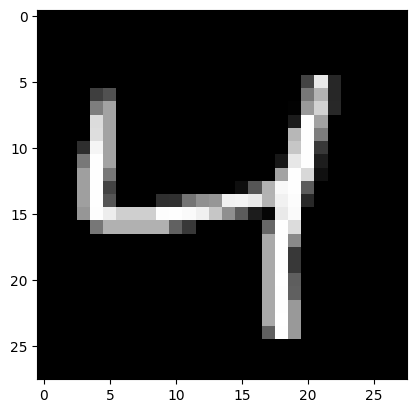

In [4]:
plt.imshow(x_train[2], cmap='gray')

In [5]:
y_train[2]

4

In [6]:
# Again, do some formatting
# we do not flatten each image into a 784-length vector because we want to perform convolutions first

# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

# change integers to 32-bit floating point numbers
x_train = x_train.astype('float32')         
x_test = x_test.astype('float32')

# normalize each value for each pixel for the entire vector for each input
x_train /= 255                              
x_test /= 255

print("Training matrix shape", x_train.shape)
print("Testing matrix shape", x_test.shape)

print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
#y_train = keras.utils.to_categorical(y_train, num_classes)
#y_test = keras.utils.to_categorical(y_test, num_classes)

Training matrix shape (60000, 28, 28, 1)
Testing matrix shape (10000, 28, 28, 1)
60000 train samples
10000 test samples


In [7]:

model = keras.Sequential(
        [
        keras.Input(shape=input_shape),
        keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        
        keras.layers.Flatten(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(10, activation="softmax"),
        ]
        )


model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━┓
┃ Layer       ┃ Output    ┃ Pa… ┃
┃ (type)      ┃ Shape     ┃   # ┃
┡━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━┩
│ conv2d      │ (None,    │ 320 │
│ (Conv2D)    │ 26, 26,   │     │
│             │ 32)       │     │
├─────────────┼───────────┼─────┤
│ max_poolin… │ (None,    │   0 │
│ (MaxPoolin… │ 13, 13,   │     │
│             │ 32)       │     │
├─────────────┼───────────┼─────┤
│ conv2d_1    │ (None,    │ 18… │
│ (Conv2D)    │ 11, 11,   │     │
│             │ 64)       │     │
├─────────────┼───────────┼─────┤
│ max_poolin… │ (None, 5, │   0 │
│ (MaxPoolin… │ 5, 64)    │     │
├─────────────┼───────────┼─────┤
│ flatten     │ (None,    │   0 │
│ (Flatten)   │ 1600)     │     │
├─────────────┼───────────┼─────┤
│ dropout     │ (None,    │   0 │
│ (Dropout)   │ 1600)     │     │
├─────────────┼───────────┼─────┤
│ dense       │ (None,    │ 16… │
│ (Dense)     │ 10)       │     │
└─────────────┴───────────┴─────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Define your hyperparameters
batch_size = 128
epochs = 6

mlflow.set_experiment("MNIST_Classification")

mlflow.keras.autolog()
    
# Train your Keras model

model.compile(
        loss=keras.losses.SparseCategoricalCrossentropy(),
        optimizer=keras.optimizers.Adam(),
        metrics=["accuracy"])
    
history = model.fit(
        x_train,
        y_train,
        batch_size=batch_size,
        epochs=epochs,
        verbose=1,
        validation_split=0.1,
    )

2024/04/26 17:02:22 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '2ffea4ef775d4748b16ebaf5d4eb6508', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current keras workflow


Epoch 1/6
422/422 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - accuracy: 0.7717 - loss: 0.7445 - val_accuracy: 0.9785 - val_loss: 0.0802
Epoch 2/6
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.9637 - loss: 0.1197 - val_accuracy: 0.9848 - val_loss: 0.0553
Epoch 3/6
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9747 - loss: 0.0833 - val_accuracy: 0.9865 - val_loss: 0.0496
Epoch 4/6
422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.9791 - loss: 0.0715 - val_accuracy: 0.9890 - val_loss: 0.0402
Epoch 5/6
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.9805 - loss: 0.0628 - val_accuracy: 0.9908 - val_loss: 0.0370
Epoch 6/6
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9830 - loss: 0.0543 - val_accuracy: 0.9903 - val_loss: 0.0368


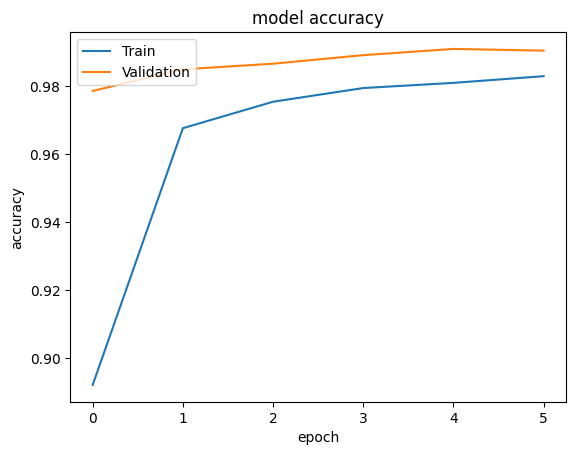

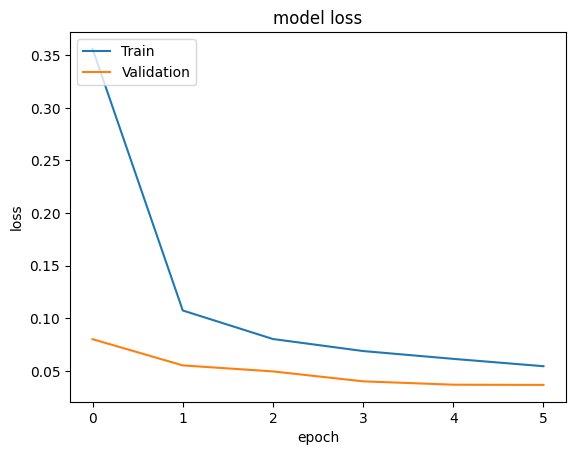

In [9]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [10]:
(y_test[2])

1

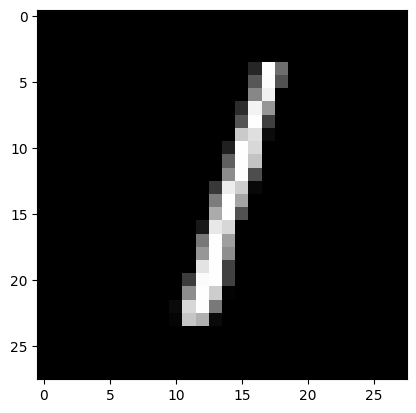

In [11]:
plt.imshow(x_test[2], cmap='gray')

In [12]:
sample_index = 6  # Change this index to select a different sample
input_image = np.expand_dims(x_test[6], axis=0)  # Adding a batch dimension

# Perform inference
predictions = model.predict(input_image)

# Convert the predicted probabilities to class labels
predicted_class = np.argmax(predictions)

# Print the predicted class
print("Predicted class:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Predicted class: 4


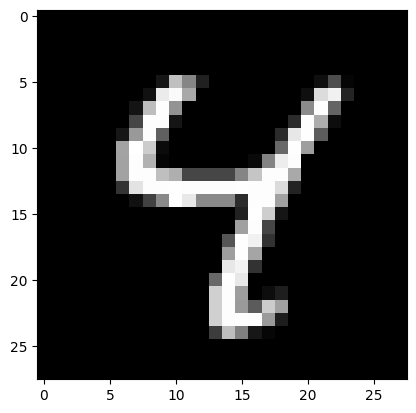

In [13]:
plt.imshow(x_test[6], cmap='gray')

In [14]:
model.save('mnist_model.keras')

In [15]:
m1 = keras.models.load_model('mnist_model.keras')

In [16]:
sample_index = 11  # Change this index to select a different sample
input_image = np.expand_dims(x_test[sample_index], axis=0)  # Adding a batch dimension

# Perform inference
predictions = m1.predict(input_image)

# Convert the predicted probabilities to class labels
predicted_class = np.argmax(predictions)

# Print the predicted class
print("Predicted class:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Predicted class: 6


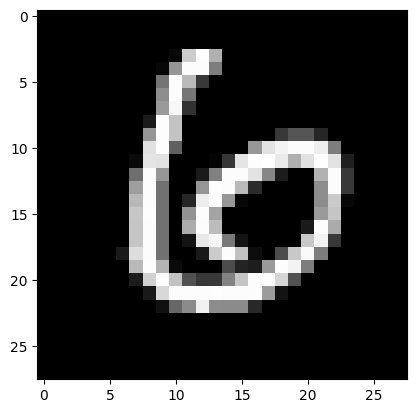

In [17]:
plt.imshow(x_test[11], cmap='gray')